# Lab 3. Genetic Algorithms
# Task 3.3 The Map Colouring Problem
## Problem Descriptions
Describe the problem here...
## Genetic Algorithm for solving 4 colour map problem -
1.  Encoding Scheme-
  *  We are using 4 colours.  These colours can be represented by 4 alleles.  Each allele would be assigne a symbolic number from 0 - 3 representing each colour.  This would be our chromosome.  Since there is 11 contries, 11 chromosomes will make up the encoding scheme.  
2.  Fitness Function - 
  *  Number of neighbors havein the same color = 0.
3.  Genetic Operators - 
  *  Selection - Based upon the fitness measure we can use this to determine which chromosome is selcted for breeding.  Selecting chromosome to mate is done by tournament selection.  
  *  Crossover - Two parents are now selected for mating in orderto produce 2 children using gentic material from each of the parents.  Single point cross over can be used.    
  *  Mutate - In order to intorduce diversity in the children population we use uniform mutation.  
## Implementation and Results

In [7]:
!pip install deap
import array
import random
import numpy as np
from deap import creator, base, tools, algorithms

In [8]:
# Specify the variables
numColour = 4
numNames = 11
colours = ('red', 'green', 'blue', 'gray')
names = ('Mark', 'Julia', 'Steve', 'Amanda', 'Brian', 
         'Joanne', 'Derek', 'Allan', 'Michelle', 'Kelly', 'Chris')

# Define the neighbours
neighbours =  [ [0,1,1,0,0,0,0,0,0,0,0],
                [0,0,1,1,1,0,1,0,0,0,0],
                [0,0,0,1,0,0,0,1,1,0,0],
                [0,0,0,0,0,1,1,0,1,0,0],
                [0,0,0,0,0,0,1,0,0,1,0],
                [0,0,0,0,0,0,1,0,1,1,1],
                [0,0,0,0,0,0,0,0,0,1,1],
                [0,0,0,0,0,0,0,0,1,0,0],
                [0,0,0,0,0,0,0,0,0,0,0],
                [0,0,0,0,0,0,0,0,0,0,1],
                [0,0,0,0,0,0,0,0,0,0,0]]


In [9]:
def evalMapColouring(ind):
    val = 0
    for i in range(0, numNames):
      for j in range(0, numNames):
        if (neighbours[i][j] == 1) and (ind[i] == ind[j]):
            val += 1
    return val,
    
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_colour", random.randint, 0, numColour-1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_colour, numNames)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evalMapColouring)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutUniformInt, low=0, up=numColour-1, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)


/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [10]:
pop = toolbox.population(n=10)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.8, mutpb=0.4, ngen=100, 
                              stats=stats, verbose=True)
    
best = tools.selBest(pop, 1)[0]
print("Best: %s. Fitness: %s." %(best.tolist(), evalMapColouring(best)[0]))
for i in range(numNames):
  print("%s ==> %s" %(names[i], colours[best[i]]))

gen	nevals	min
0  	10    	2  
1  	10    	3  
2  	9     	2  
3  	10    	2  
4  	10    	2  
5  	8     	2  
6  	10    	1  
7  	10    	1  
8  	9     	1  
9  	10    	1  
10 	8     	1  
11 	8     	1  
12 	9     	1  
13 	7     	1  
14 	8     	1  
15 	8     	1  
16 	9     	1  
17 	10    	1  
18 	8     	1  
19 	3     	1  
20 	10    	1  
21 	9     	1  
22 	6     	1  
23 	7     	1  
24 	10    	1  
25 	9     	1  
26 	10    	1  
27 	8     	1  
28 	8     	1  
29 	9     	1  
30 	9     	1  
31 	10    	1  
32 	10    	1  
33 	9     	1  
34 	10    	1  
35 	8     	1  
36 	9     	1  
37 	9     	1  
38 	9     	1  
39 	9     	1  
40 	10    	1  
41 	7     	1  
42 	10    	1  
43 	8     	1  
44 	10    	1  
45 	8     	1  
46 	7     	1  
47 	10    	1  
48 	9     	1  
49 	7     	1  
50 	8     	1  
51 	9     	1  
52 	10    	1  
53 	10    	0  
54 	7     	0  
55 	8     	0  
56 	9     	0  
57 	8     	0  
58 	9     	0  
59 	6     	0  
60 	8     	0  
61 	9     	0  
62 	10    	0  
63 	7     	0  
64 	9     	0  
65 	10    

##Solution

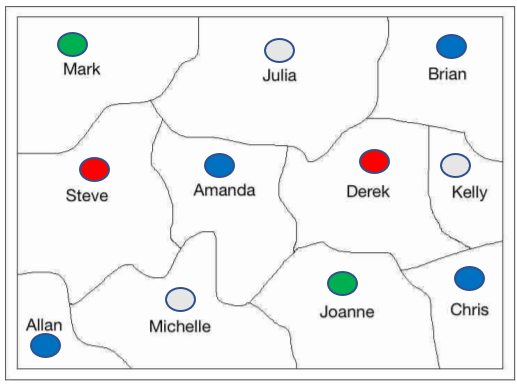

## Discussions

In this task, ... we used Genetic Alogorithm(GA) to solve the 4-color-map problem.  As seen above the solution GA produce was of high quality making it perfect for solving problems of this type.  

The coloring for the 11 cities was described by a length of string equl to 11.  A 11 x 11 matrix was used in this case.  GAs fitness function gives it something to aim at, in other words it provides the much needed direction GA uses to produce a working result.  A simulation was created to test the solution above.  It works!
